In [2]:
import pandas as pd

# Cargar la base de datos (reemplaza 'archivo.xlsx' por el nombre de tu archivo)
df = pd.read_csv('listings.csv.gz')

# Quitar valores nulos de la columna 'price'
df = df.dropna(subset=['price'])

# Quitar el símbolo '$' y las comas de la columna 'price'
df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True)

# Convertir la columna 'price' a float
df['price'] = df['price'].astype(float)

# Calcular el promedio de los precios
promedio_precio = df['price'].mean()
print(f'Promedio de precios: {promedio_precio}')

Promedio de precios: 1665.005981511691


In [3]:
# Mostrar el valor más común de la columna 'room_type'
mas_comun_room_type = df['room_type'].mode()[0]
print(f'El tipo de habitación más común es: {mas_comun_room_type}')

El tipo de habitación más común es: Entire home/apt


In [4]:
# Mostrar las 10 alcaldías con más alojamientos
top_alcaldias = df['neighbourhood_cleansed'].value_counts().head(10)
print('Las 10 alcaldías con más alojamientos son:')
print(top_alcaldias)

Las 10 alcaldías con más alojamientos son:
neighbourhood_cleansed
Cuauhtémoc             10434
Miguel Hidalgo          3764
Benito Juárez           2482
Coyoacán                1362
Álvaro Obregón           799
Venustiano Carranza      752
Tlalpan                  582
Gustavo A. Madero        424
Iztacalco                389
Azcapotzalco             317
Name: count, dtype: int64


In [5]:
# Mostrar los 10 host_name con más alojamientos
top_hosts = df['host_name'].value_counts().head(10)
print('Las 10 personas con más alojamientos son:')
print(top_hosts)

Las 10 personas con más alojamientos son:
host_name
Alejandra     305
Alejandro     244
Juan          241
Raul          225
Blueground    225
Luis          214
Mr. W         201
Carlos        175
Eduardo       173
Jorge         172
Name: count, dtype: int64


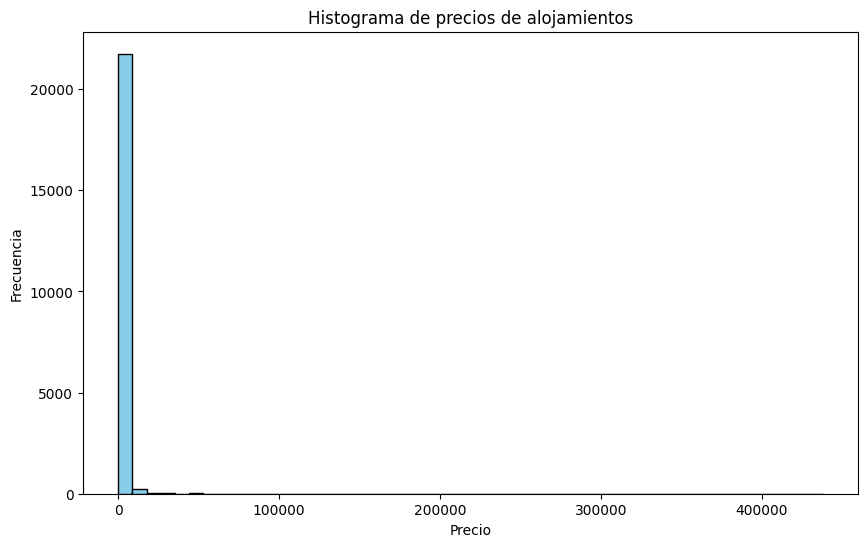

In [6]:
import matplotlib.pyplot as plt

# Graficar el histograma de precios
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de precios de alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

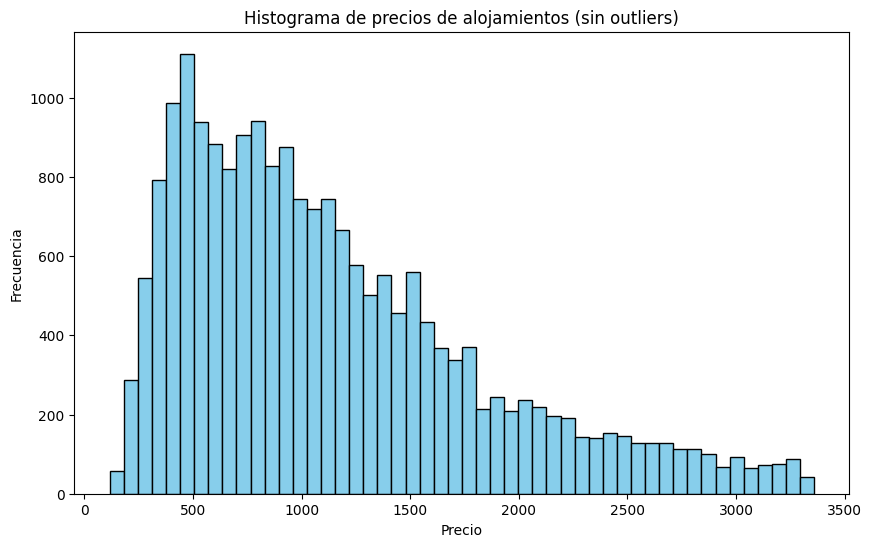

In [7]:
# Histograma de precios sin outliers (usando IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_sin_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

plt.figure(figsize=(10,6))
plt.hist(df_sin_outliers['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de precios de alojamientos (sin outliers)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

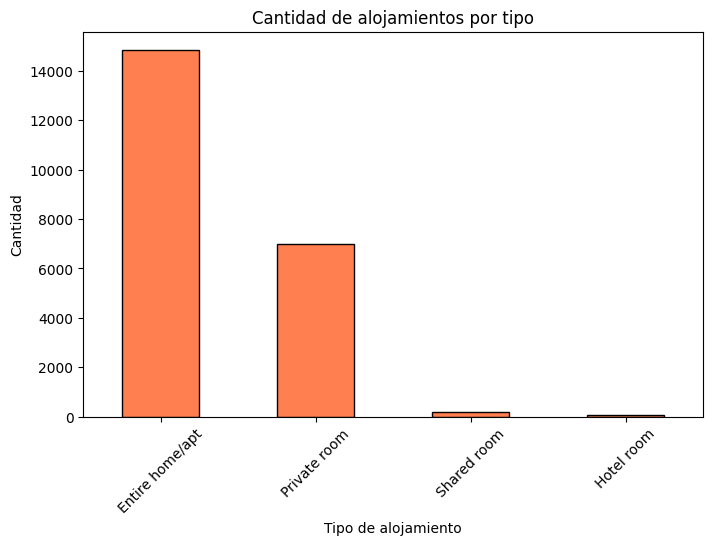

In [8]:
# Gráfica de barras: tipos de alojamiento vs cantidad
room_type_counts = df['room_type'].value_counts()
plt.figure(figsize=(8,5))
room_type_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Cantidad de alojamientos por tipo')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

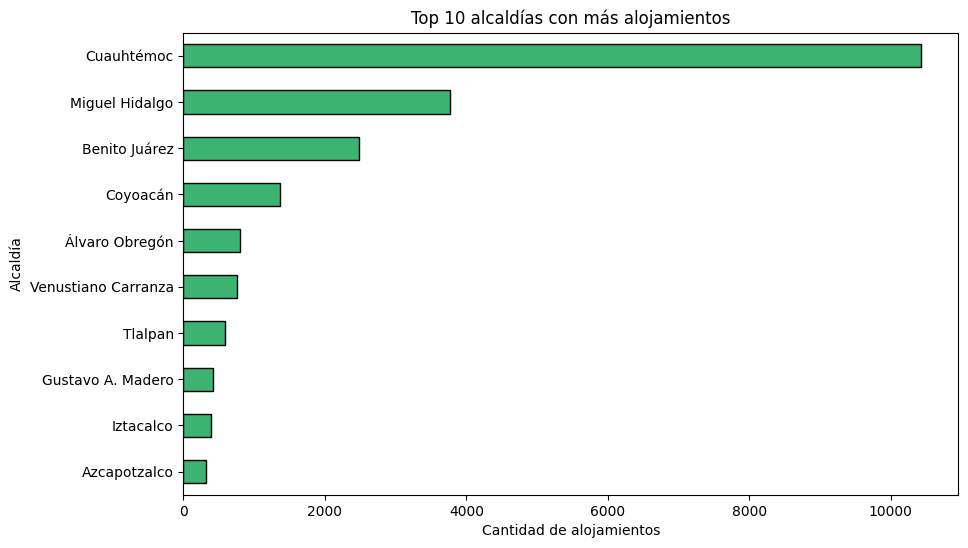

In [9]:
# Gráfica de barras horizontal del top 10 alcaldías con más alojamientos
top_alcaldias = df['neighbourhood_cleansed'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_alcaldias.plot(kind='barh', color='mediumseagreen', edgecolor='black')
plt.title('Top 10 alcaldías con más alojamientos')
plt.xlabel('Cantidad de alojamientos')
plt.ylabel('Alcaldía')
plt.gca().invert_yaxis()
plt.show()

In [12]:
import plotly.express as px

# Gráfica de distribución geográfica de precios con scattermapbox (sin bordes)
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="price",
                      color_continuous_scale="Jet", size_max=8, zoom=10,
                      mapbox_style="open-street-map",
                      title="Distribución geográfica de precios de alojamientos")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

C:\Users\Anonimo\AppData\Local\Temp\ipykernel_21304\1770413547.py:4: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [15]:
# Gráfica de distribución geográfica de precios sin outliers con scattermapbox
fig = px.scatter_mapbox(df_sin_outliers, lat="latitude", lon="longitude", color="price",
                      color_continuous_scale="Hot", size_max=8, zoom=10,
                      mapbox_style="open-street-map",
                      title="Distribución geográfica de precios de alojamientos (sin outliers)")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

C:\Users\Anonimo\AppData\Local\Temp\ipykernel_21304\2472801206.py:2: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [16]:
# Predicción de precios usando regresión lineal simple
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecciona algunas variables predictoras (puedes ajustar según tu análisis)
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews']
df_model = df_sin_outliers.dropna(subset=features)

X = df_model[features]
y = df_model['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

# Mostrar algunos valores reales vs predichos
resultados = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
print(resultados.head())

MSE: 452677.44
R2: 0.07
         Real     Predicho
10263   493.0   943.175329
1289    839.0  1457.021851
19545  1426.0  1157.667814
1811    752.0  1393.666282
18126  2614.0  1385.582263


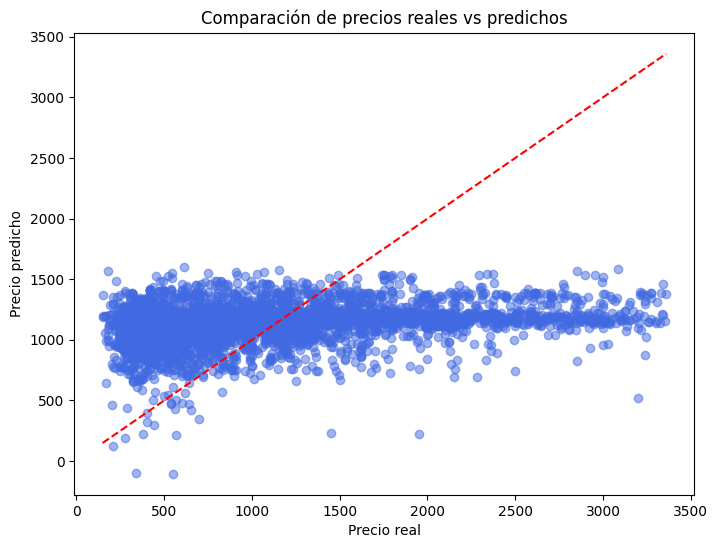

In [17]:
# Gráfica de valores reales vs predichos
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(resultados['Real'], resultados['Predicho'], alpha=0.5, color='royalblue')
plt.plot([resultados['Real'].min(), resultados['Real'].max()], [resultados['Real'].min(), resultados['Real'].max()], 'r--')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación de precios reales vs predichos')
plt.show()

In [18]:
# Predicción de precios usando Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Usar las mismas variables predictoras
X = df_model[features]
y = df_model['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'MSE (Random Forest): {mse_rf:.2f}')
print(f'R2 (Random Forest): {r2_rf:.2f}')

# Mostrar algunos valores reales vs predichos
resultados_rf = pd.DataFrame({'Real': y_test, 'Predicho_RF': y_pred_rf})
print(resultados_rf.head())

MSE (Random Forest): 312745.42
R2 (Random Forest): 0.36
         Real  Predicho_RF
10263   493.0   738.470000
1289    839.0  1104.610000
19545  1426.0  1598.970000
1811    752.0   617.260000
18126  2614.0  2568.147667


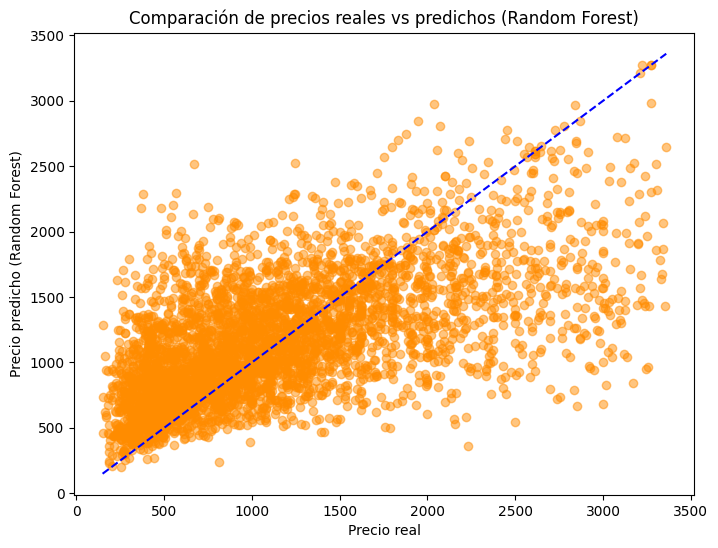

In [19]:
# Gráfica de valores reales vs predichos (Random Forest)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(resultados_rf['Real'], resultados_rf['Predicho_RF'], alpha=0.5, color='darkorange')
plt.plot([resultados_rf['Real'].min(), resultados_rf['Real'].max()], [resultados_rf['Real'].min(), resultados_rf['Real'].max()], 'b--')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho (Random Forest)')
plt.title('Comparación de precios reales vs predichos (Random Forest)')
plt.show()